In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取三个年份的数据
df_2015 = pd.read_csv(r'C:\Users\FeatherWounds\Downloads\2015年国内主要城市年度数据.csv')
df_2016 = pd.read_csv(r'C:\Users\FeatherWounds\Downloads\2016年国内主要城市年度数据.csv')
df_2017 = pd.read_csv(r'C:\Users\FeatherWounds\Downloads\2017年国内主要城市年度数据.csv')

# 合并三年的数据
df_2015['年份'] = 2015
df_2016['年份'] = 2016
df_2017['年份'] = 2017
df_all = pd.concat([df_2015, df_2016, df_2017])

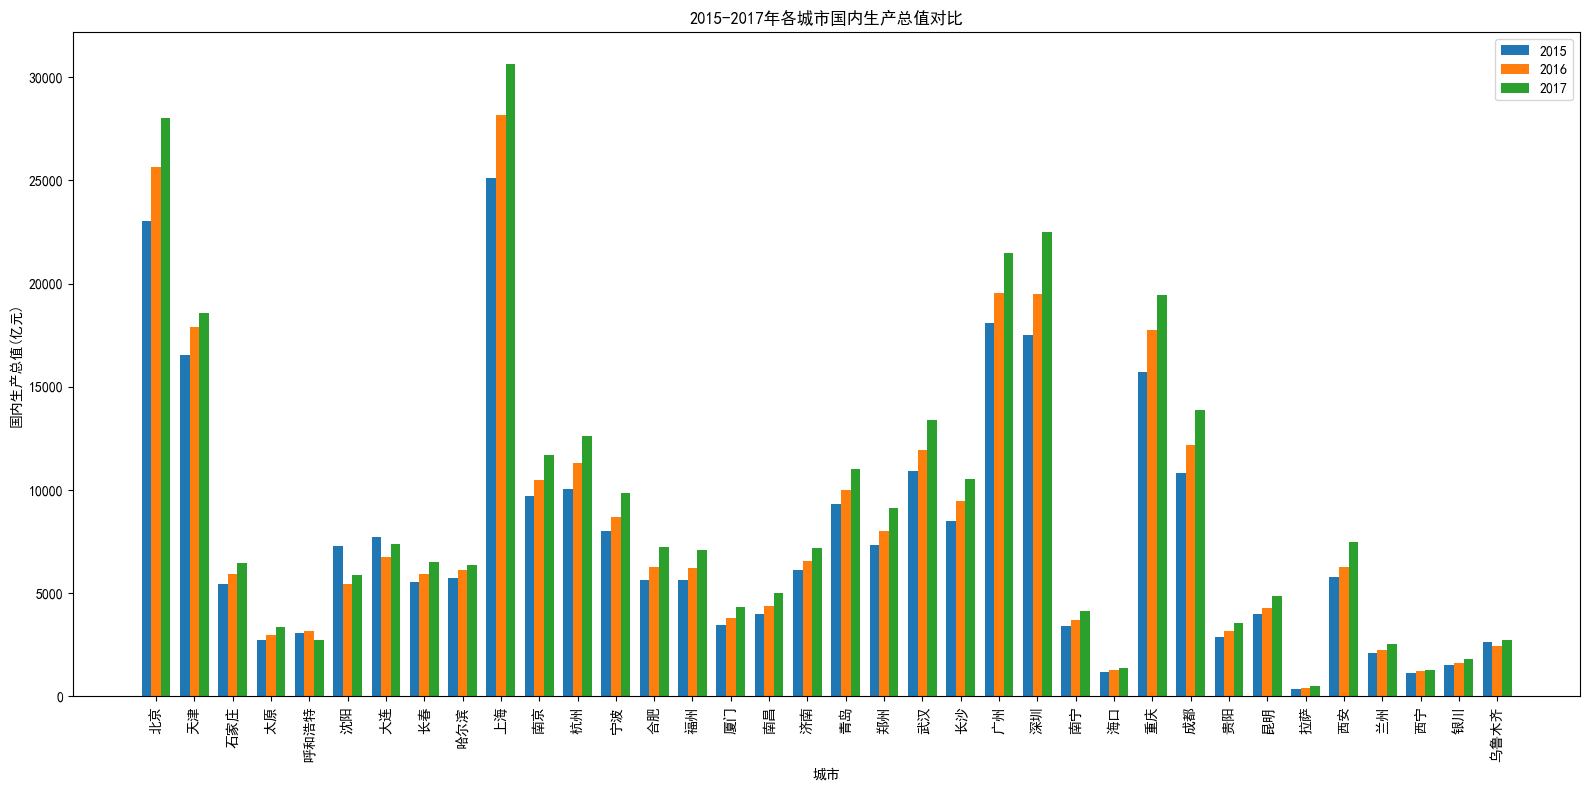

In [2]:
# 1. 绘制2015-2017年各个城市的国内生产总值的直方图
plt.figure(figsize=(16, 8))
cities = df_all['地区'].unique()
years = [2015, 2016, 2017]
bar_width = 0.25
index = np.arange(len(cities))

for i, year in enumerate(years):
    year_data = df_all[df_all['年份'] == year]
    gdp_values = [year_data[year_data['地区'] == city]['国内生产总值'].values[0] for city in cities]
    plt.bar(index + i*bar_width, gdp_values, bar_width, label=str(year))

plt.xlabel('城市')
plt.ylabel('国内生产总值(亿元)')
plt.title('2015-2017年各城市国内生产总值对比')
plt.xticks(index + bar_width, cities, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

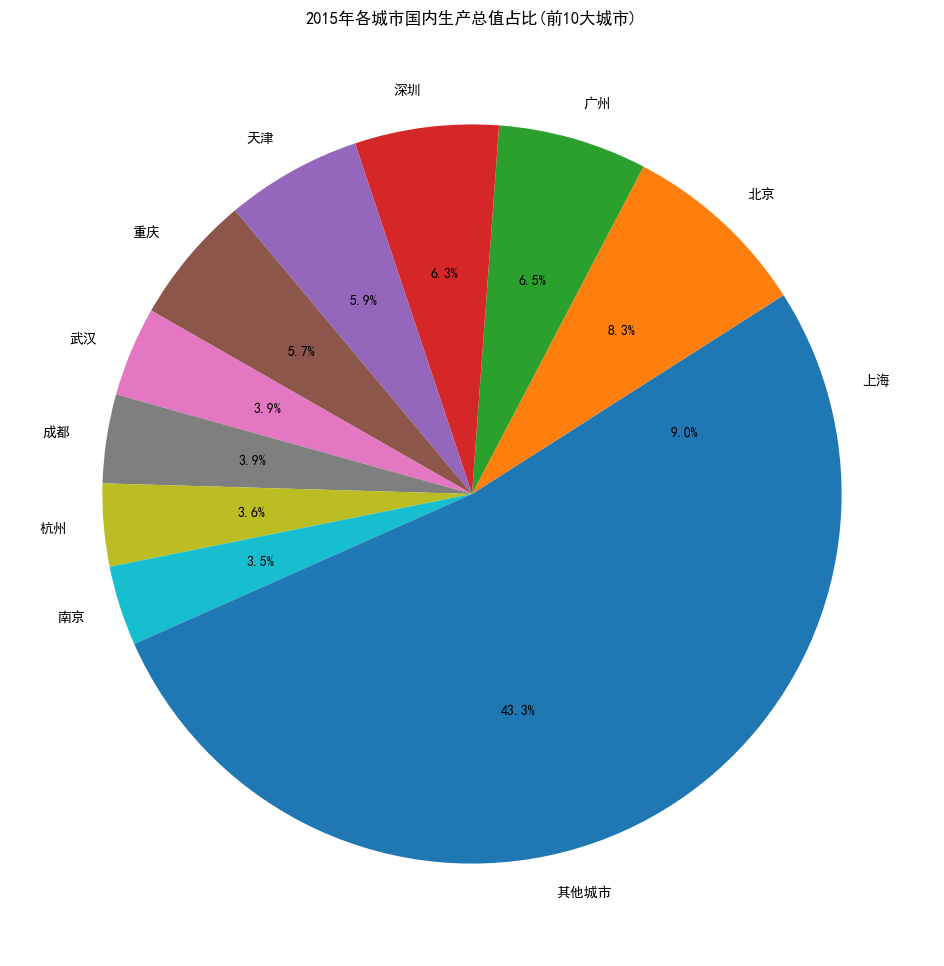

In [3]:
# 2. 绘制2015年各个城市的国内生产总值的饼状图
plt.figure(figsize=(12, 12))
gdp_2015 = df_2015.sort_values('国内生产总值', ascending=False)
# 只显示前10大城市，其余合并为"其他城市"
top10 = gdp_2015.head(10)
other = pd.DataFrame({
    '地区': ['其他城市'],
    '国内生产总值': [gdp_2015['国内生产总值'][10:].sum()]
})
gdp_for_pie = pd.concat([top10[['地区', '国内生产总值']], other])

plt.pie(gdp_for_pie['国内生产总值'], labels=gdp_for_pie['地区'], autopct='%1.1f%%')
plt.title('2015年各城市国内生产总值占比(前10大城市)')
plt.show()